# DSCI 6003 4.3 Lecture

## Review of Naive Bayes, Bayesian Updates and Bernoulli Bayes

### By the End of This Lecture You Will

1. Be more familiar with the theory behind Naive Bayes
2. Be comfortable with Bayesian Updates and be able to develop your own concept of them

## References
Stanford nlp class has some nice references for naive Bayes and related techniques.  Here are some that relate directly.  
http://nlp.stanford.edu/IR-book/html/htmledition/text-classification-and-naive-bayes-1.html
http://nlp.stanford.edu/IR-book/html/htmledition/naive-bayes-text-classification-1.html  
http://nlp.stanford.edu/IR-book/html/htmledition/the-bernoulli-model-1.html  

Other refs (including video)
http://blog.datumbox.com/machine-learning-tutorial-the-naive-bayes-text-classifier/  - blog post  
http://www.cs.cmu.edu/~knigam/papers/multinomial-aaaiws98.pdf  - comparison paper  
https://www.youtube.com/watch?v=pc36aYTP44o - Jurafsky video  

## Naive Bayes: A Review

### Why is Naive Bayes "Naive?"
1. Assumes that all conditional distributions $P(x_{i}|c_{k})$ are independent. Please see chain rule.
2. We assume that we have a perfect sample of the input distributions.
3. We ignore the effects of the joint.

### A slightly more precise description of Multinomial NB:

The total likelihood of observing a given histogram (distribution) is the joint probability of every bin for a given event $x_i$ found $n_i$ times in the histogram:

$P(C_{k}|{\bf{x}}) = \dfrac{(\sum_{i}n_{i})!}{\prod_{i}n_{i}!}\prod_{i}P(x_{i}|C_{k})^{n_i}P(C_{k})$

To use it as a NB maximum-likelihood method, we just dump the whole coefficient in front and take the log-likelihood:

$$P(C_{k}|{\bf{x}}) = log(P(C_{k})) + \sum_{i}n_{i}log(P(x_{i}|C_{k}))$$

Note that this is another linear equation:

$$ log(P(C_{k})) + \sum_{i}n_{i}log(P(x_{i}|C_{k})) = b + w^{T}\bf{x} $$

## Inference and Bayesian Updating

Note that the way we have formulated Naive Bayes assumes that we have a perfectly complete sample, meaning that we do not update our prior beliefs. What does it mean if we think that new data (our test data) should affect our predictions? This falls within the realm of *bayesian updating*. The mathematics of bayesian updating is described directly from Bayes' law, and only requires that we can recognize it and execute it where needed.

### Formulation:

Suppose that a process generates a set of observations (events) $E_{m}$ and that we have a set of **models** $M_{k}$ describing this process. Each model is represented (defined) by the conditional probability tables $P(E_{m}|M_{k})$ and our **belief that this model is correct** is represented by the prior $P(M_{k})$.

**Before** the first inference step, the prior distribution of our set of models $M_{k}$, $\{P(M_m)\}$ is a set of initial prior probabilities, obtained perhaps from expert knowledge. These must sum to 1, but are **otherwise arbitrary.**

**After** each inference step $t+1$, we update the conditional probability tables $P(E_{m}|M_{k})$ by *multiplying them by our current belief in that model* $P(M_{k,t+1})$:

$$P(M_{k,t+1}|E_{m,t+1}) = \dfrac{P(E_{m,t}|M_{k,t})}{\sum_{k=0}^{K}P(E_{m,t}|M_{k,t})}\ P(M_{k,t+1})$$

Please note that the denominator is simply a normalization factor to ensure that we have a distribution over each of the $K$ models.

Okay, so how do we go about getting this number $P(M_{k,t+1})$? Precisely, it is this prior that is allowed to change with respect to each new event $E_{m,t+1}$. We get this update from the way we formulate the problem. After multiplication by the proper likelihood (comes from a table worked out beforehand), the posterior becomes a new prior.

This process is called **Bayesian updating.**


Although obtaining the update formula can be very complex indeed, but doesn't need to be for you to understand how it works conceptually.

### Example 1: Cookies in Bowls

We have two bowls with cookies in them. One bowl (B1) has 5 chocolate chip cookies and 15 plain cookies in it, while the other bowl (B2) has 10 of each. We randomly draw a cookie from one of the bowls and we see that it is a plain cookie. How likely is it that the cookie came from the first bowl? 

#### Formulation: 

We seek $P(B1|plain)$. Our hypothesis priors on the bowls before pulling cookies are:

$$P(B1) == P(B2) == 0.5$$

We also have knowledge beforehand that the likelihood of it being a plain cookie, given bowl 1 is $$P(plain|B1) = \dfrac{15}{20} = \dfrac{3}{4} = 0.75$$
and the likelihood of it being a chocolate cookie given bowl 1 is $$P(choc|B1) = \dfrac{5}{20} = \dfrac{1}{4} = =0.25$$
Conversely, $$P(choc|B2) = P(plain|B2) = \dfrac{1}{2} = 0.5$$


Using Bayes' Law upon the first draw $t=1$: 

$$P_{t=1}(B1|plain) = \dfrac{\dfrac{3}{4} \times \dfrac{1}{2}}{\dfrac{3}{4} \times \dfrac{1}{2}+\dfrac{1}{2} \times \dfrac{1}{2}} = \dfrac{\dfrac{3}{8}}{\dfrac{5}{8}}  = \dfrac{3}{5} = 0.6$$

So now our model that $B1$ is the bowl from which we are pulling cookies becomes this value! Thus $P(B1) = 0.6$ This is our belief that this bowl is the origin of the cookie. 

Let's continue the experiment to $t=2$. Now we reach over and grab another cookie. Again it is plain. Therefore we do the update again, based on the fact that we found the posterior for P(B1|plain):

$P_{t=2}(B1|plain) = \dfrac{0.75 \times 0.6}{0.75 \times 0.6 + 0.25} = 0.64$

Again, this posterior becomes the new prior for the next update $t=3$. **Note that the likelihoods are NOT probability functions and they do not change between steps!!**

### QUIZ (important):

What would the update be if we pulled a chocolate cookie? Recall that we are updating $P(B1)$

$P_{t=3}(B1|choc) = \dfrac{P(choc|B1)P_{t=2}(B1)}{P(choc)}$

### Example 2: Coin Flips - Is the coin fair?

Here I have constructed for you a simulation of coin flips, representing the prior in full as a distribution over the entire probability space $0 < P(heads) < 1$. Thus in this case, each subdivision $i$ of the probability space counts as a single model of $M_{i} = P(heads) = p_{i}$.

Suppose we don't know if the coin we are flipping is fair. Say we know nothing about it. We can construct a probability table that reflects a continuum of hypotheses about the probability $p(H)$, ranging from 0 to 1. Note that the probability we will give tails is $1-p(H)$. This probability table then represents the probability distribution of the prior hypothesis, and we update it as above.



In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

def coin_study(divs, flip_sequence = ['T','F']):
    
    # generate the hypothesis function with a given set of subdivisions for confidence
    
    hypothesis = [1.0]*divs
    
    def normalize(hypothesis):
        p_sum = sum(hypothesis)
        for confidence in xrange(divs):
            pos = hypothesis[confidence]
            hypothesis[confidence] = pos/p_sum

    def update_success(hypothesis):
        # This function hypothesizes that the coin gives only heads p = 'H'
        for confidence in xrange(divs):
            hypothesis[confidence] = hypothesis[confidence]*(confidence/float(divs)) # h(p,t+1) = p(d)*p(H)
        normalize(hypothesis)

    def update_failure(hypothesis):
        # This function hypothesizes that the coin gives only tails: 1-p = 'T'
        for confidence in xrange(divs):
            hypothesis[confidence] = hypothesis[confidence]*(1.0-(confidence/float(divs))) # h(p,t+1) = (1-p(d))*p(H)
        normalize(hypothesis)

    for flip in flip_sequence:
        if flip == "H":
            update_success(hypothesis)
        else:
            update_failure(hypothesis)
        
    fig, ax = plt.subplots()
    ax.bar(np.arange(divs),hypothesis)
    ax.set_xlim([0,divs])


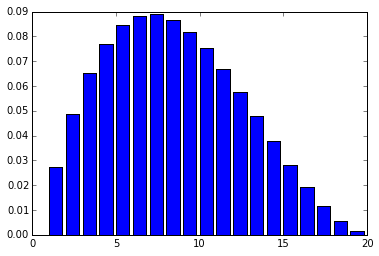

In [89]:
coin_study(20,['H','T','T'])

## The Beta Distribution

As can be seen above, the flowing changes to the prior don't resemble any kind of normal distribution, however, they can be characterized with a different PDF, the **beta** distribution.

$$\beta_{PDF} = \dfrac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1} = \dfrac{1}{B(\alpha+\beta)}x^{\alpha-1}(1-x)^{\beta-1}$$

This denominator is a normalization factor, and simply is a sum over the whole distribution, such that the probabilities sum to 1.

The [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is used to characterize random variables bound to intervals. The distribution is not an exact description of any kind of probability, but rather a clean way to characterize a family of related distribution behaviors.

## Bernoulli Bayes

As an analogy to the above example, we can use Bernoulli Naive Bayes if we are only concerned with whether or not a feature appears at all in the data (a binary variable), rather than the number of counts of each feature, in determining a class.( i.e. is or is not a customer, did or did not buy something, etc.)

$$n_{i} \in \{0,1\}$$

$$P(C_{k}|{\bf{x}}) = log(P(C_{k})) + \sum_{i}n_{i}log(P(x_{i}|C_{k})) + (1-n_{i})(log(1 - P(x_{i}|C_{k})))$$

Note that it has the special benefit of explicitly modeling the absence of terms. It is not the same as setting multinomial bayes with a binary variable.

### Comparing Multinomial vs. Bernoulli Bayes:


'''
    class MultinomialBayes:

        (...)

        def fit(D, C): 
            # Count all the documents in D, save to N
            # Extract the vocabulary in D (get corpus), save to V
            # for each class c in C
                # count all documents in D belonging to that class, Nc
                # update the prior[c] with Nc
                # store all text belonging to all documents in that class (bag of words) to T
                # for each word v in V
                    # count each occurrence of word in T (with Counter or equivalent) store to Tcv
                # for each word v in V
                    # add in the count to the conditional probability table P(v, c) += (T_{cv}+ a)/sum(T_{cv'})+a*N
            # store V, N, P(v,c)

         def predict(newDoc, C, V, P(v,c)):
             # Extract vocab V from newDoc
             # Extract word counts T from newDoc
             # for each class c in C
                 # initialize score[c] = log(prior[c])
                 # for each occurrence of word t in T:
                    # score[c] += log(P(v, c))
             # return argmax(score[c])
         
'''


'''
    class BernoulliBayes:

        (...)

        def fit(D, C): 
            # Count all the documents in D, save to N
            # Extract the vocabulary in D (get corpus), save to V
            # for each class c in C
                # count all documents in D belonging to that class, Nc
                # update the prior[c] with Nc
                # store all text belonging to all documents in that class (bag of words) to T
                # for each word v in V
                    # count all docs in D containing v, Ncv
                    # add in the count to the conditional probability table P(v, c) += (N_{cv} + 1)/(Nc + 2)
            # store V, N, P(v,c)

         def predict(newDoc, C, V, P(v,c)):
             # Extract vocab V from newDoc
             # Extract word counts T from newDoc
             # for each class c in C
                 # initialize score[c] = log(prior[c])
                 # for all v in V:
                     # if v is in T:
                        # score[c] += log(P(v, c))
                     # else:
                        # score[c] += (log(1 - P(v, c))
             # return argmax(score[c])
         
'''


### QUIZ:
Where might we use Bernoulli Bayes? As a **reach goal**, implement bernoulli bayes in your Naive Bayes code.